In [26]:
#--------------------------------
# pyspark --packages com.databricks:spark-xml_2.10:0.4.1
import sys
import os
import pyspark
import time
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
from pyspark.sql.functions import *
from pyspark.sql.types import StringType, IntegerType, StructType, StructField, DoubleType, FloatType, DateType, TimestampType
from pyspark.sql.functions import date_format, col, desc, udf, from_unixtime, unix_timestamp, date_sub, date_add, last_day



In [19]:
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

In [2]:
# df = spark.read.data()
# pyspark --master yarn-client
# ------------------------------
# Terminal command ------------------------------------------------
# df = spark.read.format('com.databricks.spark.xml').options(rowTag='HistoricalTextData').load('/home/koukira/IoT_Predictive_Maintenance_Demo/rw_XML_train')

# df.show()

# df = df.withColumn("TimeStamp", df["TimeStamp"].cast("timestamp")).groupBy("TimeStamp").pivot("TagName").sum("TagValue").na.fill(0)

# df.repartition(1).write.csv("rw_etl.csv", header=True, sep=",")


#--------------spark.sql trail
# query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# # Run the query
# flight_counts = spark.sql(query)

# # Convert the results to a pandas DataFrame
# pd_counts = flight_counts.toPandas()

# # Print the head of pd_counts
# print(pd_counts.head())

#terminal執行 spark-submit  --packages com.databricks:spark-xml_2.10:0.4.1 /home/koukira/IoT_Predictive_Maintenance_Demo/rw_XML_train/Sensor_ETLsparksubmit.py

In [25]:
import pandas as pd
import csv
import numpy as np
import random
import re
import glob
import matplotlib
import matplotlib.pyplot as plt
from IPython import get_ipython
# get_ipython().magic('%matplotlib inline')
df = pd.read_csv('/home/koukira/IoT_Predictive_Maintenance_Demo/rw_etl.csv/scara',sep= '\t',low_memory=False) #.sort_values(['TimeStamp'], ascending=True).reset_index()
# # df3 = pd.read_csv('/home/koukira/IoT_Predictive_Maintenance_Demo/rw_etl.csv/bind',sep= '\t',low_memory=False) #.sort_values(['TimeStamp'], ascending=True).reset_index()
# df3 = pd.read_csv('/home/koukira/IoT_Predictive_Maintenance_Demo/pure/scara227-1',sep='\t',low_memory=False) #.sort_values(['TimeStamp'], ascending=True).reset_index()

# # df3.drop(columns = ['TimeStamp'])
df2['TimeStamp'].drop
# # del df3['TimeStamp']
df2['J4ActualPosition'][65:1000].plot()
# # df[df['J1ActualPosition'].max()]
# # df2[df2.J3ActualPosition==df2.J3ActualPosition.min()]
# # df3.to_csv("scara227-1",sep='\t',encoding='utf-8')
# # df.plot()
# # df3.mean()
df2.head()
# df3.shape # 列出行列row,col
# df.to_csv("scara0",sep='\t',encoding='utf-8')



Unnamed: 0                TimeStamp  J1ActualPosition  J1PositionError  \
0         101  2018-11-22 14:03:06.789         76.775742        -0.187272   
1         102  2018-11-22 14:03:06.840          0.000000         0.000000   
2         103  2018-11-22 14:03:06.843         76.035934        -0.191016   
3         104  2018-11-22 14:03:06.887          0.000000         0.000000   
4         105  2018-11-22 14:03:06.891         75.427612        -0.233568   

   J1qcmd  J2ActualPosition  J2PositionError  J2qcmd  J3ActualPosition  \
0    -6.4        -58.848862         0.031787     5.3          7.438687   
1     0.0          0.000000         0.000000     0.0          0.000000   
2    -6.9        -57.985394         0.030284     5.9          8.134562   
3     0.0          0.000000         0.000000     0.0          0.000000   
4    -8.5        -57.304520         0.027040     5.6          8.647562   

   J3PositionError  ...    J4ActualPosition  J4PositionError  J4qcmd  \
0         0.612438  ...         -358.675995        -0.082740     6.8   
1         0.000000  ...            0.000000         0.000000     0.0   
2         0.632000  ...         -355.537262         3.239097    14.2   
3         0.000000  ...            0.000000         0.000000     0.0   
4         0.646938  ...         -349.991333         3.452366    14.6   

   cs_ActualPosition0  cs_ActualPosition1  cs_ActualPosition2  \
0          255.124832          238.897293            -3.87569   
1            0.000000            0.000000             0.00000   
2          257.181274          238.768494            -2.95781   
3            0.000000            0.000000             0.00000   
4          259.098694          238.310715            -2.24857   

   ActualPosition0  ActualPosition1  ActualPosition2  speed  
0        76.775742       -58.848862         -3.87569  100.0  
1         0.000000         0.000000          0.00000    0.0  
2        76.035934       -57.985394         -2.95781  100.0  
3         0.000000         0.000000          0.00000    0.0  
4        75.427612       -57.304520         -2.24857  100.0  

[5 rows x 21 columns]

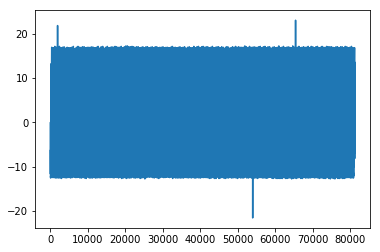

In [148]:
# df2['J1qcmd'].plot()

# preprocessing

In [1]:
# k =df[df.cs_ActualPosition1==df.cs_ActualPosition1.max()].index
# k2 =df[df.cs_ActualPosition2==df.cs_ActualPosition2.max()].index

# j = df[df.J1ActualPosition==df.J1ActualPosition.max()].index
# j2 = df[df.J2ActualPosition==df.J2ActualPosition.max()].index
# l = df[df.speed==df.speed.max()].index
# df = df.drop(j&k&l&k2&j2)
# # ll = df[df.speed==df.speed.max()].index
# # df = df.drop(ll)
# # df=df.drop(df[df.speed==df.speed.max()].index)
# # df = df.drop(df.TimeStamp)
# # print(df[df.speed==df.speed.max()])
# df['J1ActualPosition'].plot()
# # df.info()

世界座標＝卡式座標

In [164]:
# df.info() ;df.columns;df.describe()
# df['speed'].max();
# df.mean()
# for row in df.iterrows():
#     print(row['c1'], row['c2'])

# for j,row in range(0,len(df)):
#     for i in df:

        
for i, row in df2.iterrows():
    for j, column in row.iteritems():
        try:
            if column != 0:
                column = column + 4*np.random.randn()-6*np.random.randn()
#                 print(column)
            else:
                continue
        except Exception:
            continue


df2.to_csv("scara1-16",sep='\t',encoding='utf-8')
            
# for i in df['J1ActualPosition']:
#     if i != 0 :
#         i = i + np.random.randn()+np.random.random()
# #         print(i)
#     else:
#         continue
# for i in df['J1PositionError']:
#     if i != 0 :
#         i+= np.random.randn()
# #         print(i)
#     else:
#         continue
# for i in df['J2ActualPosition']:
#     if i != 0 :
#          i = i + np.random.randn() - np.random.random()
# #         print(i)
#     else:
#         continue
# for i in df['J3ActualPosition']:
#     if i != 0 :
#         i+= np.random.randn()
# #         print(i)
#     else:
#         continue
# for i in df['J3PositionError']:
#     if i != 0 :
#         i+= np.random.randn()
# #         print(i)
#     else:
#         continue
# for i in df['J4ActualPosition']:
#     if i != 0 :
#         i+= np.random.randn() + np.random.random()
# #         print(i)
#     else:
#         continue
# for i in df['J4PositionError']:
#     if i != 0 :
#         i+= np.random.randn()
# #         print(i)
#     else:
#         continue


# for i in df['cs_ActualPosition0']:
#     if i != 0 :
#         i+= np.random.randn()*2
# #         print(i)
#     else:
#         continue
# for i in df['cs_ActualPosition1']:
#     if i != 0 :
#         i+= np.random.randn()*2
# #         print(i)
#     else:
#         continue
# for i in df['cs_ActualPosition2']:
#     if i != 0 :
#         i+= np.random.randn() - np.random.random()
# #         print(i)
#     else:
#         continue

# for i in df['ActualPosition0']:
#     if i != 0 :
#         i+= np.random.randn()*2
#     else:
#         continue
# for i in df['ActualPosition1']:
#     if i != 0 :
#         i+= np.random.randn()*2
#     else:
#         continue
# for i in df['ActualPosition2']:
#     if i != 0 :
#         i+= np.random.randn() - np.random.random()
#     else:
#         continue
# for i in df['speed']:
#     if i != 0 :
#         i+= np.random.randn() - np.random.random()
#     else:
#         continue


# print(df[df.J1ActualPosition==df.J1ActualPosition.max()]) #54101
# print(df[df.J1PositionError==df.J1PositionError.min()]) #33 ,min>>81381
# print(df[df.J1qcmd==df.J1qcmd.min()])  #54101
############# J2
# print(df[df.J2ActualPosition==df.J2ActualPosition.min()])  #54101
# print(df[df.J2PositionError==df.J2PositionError.max()])
# print(df[df.J2qcmd==df.J2qcmd.max()])
############# J3
# print(df[df.J3ActualPosition==df.J3ActualPosition.min()]) #65421
# print(df[df.J3PositionError==df.J3PositionError.max()]) # 54101
# print(df[df.J3qcmd==df.J3qcmd.max()])  # 54101
############# J4-sphere
# print(df[df.J4ActualPosition==df.J4ActualPosition.min()]) #54101
# print(df[df.J4PositionError==df.J4PositionError.max()]) # 54101
# print(df[df.J4qcmd==df.J4qcmd.min()])  # 54101
# # ############# cs
# print(df[df.cs_ActualPosition0==df.cs_ActualPosition0.max()]) #54101
# print(df[df.cs_ActualPosition1==df.cs_ActualPosition1.max()]) # min>>>65421 min>>>54101
# print(df[df.cs_ActualPosition2==df.cs_ActualPosition2.min()])  # 54101
############# Actual
# print(df[df.ActualPosition0==df.ActualPosition0.max()]) #54101
# print(df[df.ActualPosition1==df.ActualPosition1.min()]) # 54101
# print(df[df.ActualPosition2==df.ActualPosition2.min()])  # 54101
# print(df[df.speed==df.speed.max()])  # 54101

# df['speed'].plot() 

# df.ActualPosition2
# df.query(df.speed>199)
# df['cs_ActualPosition0'].mean()
# df.var()
# df.mean()
# df.head()
# type(df) # df.shape #df.columns #type(df.columns) # df.info()
# slicing

In [16]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pandas.plotting import andrews_curves
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from matplotlib import cm
# %matplotlib inline #clear the layout
# plotly.tools.set_credentials_file(username='Rmj009',api_key='••••••••••') #KuronLin ••••••••••
plotly.tools.set_credentials_file(username='KuronLin',api_key='oAgmByFI8KVJXexNp') 

# df.plot(x="TimeStamp", y="J1.qcmd", kind="line")
# df.plot(x="TimeStamp", y=["J1.ActualPosition","J3.qcmd","speed"], kind="line")
# df.plot(x="TimeStamp", y=["cs_ActualPosition0","cs_ActualPosition1"], kind="line")
# df.plot() ;plt.title('Scara posture'); plt.xlabel('cycles') ;plt.ylabel('fluction rate%')
# plt.figure() #佈置一張畫表
# andrews_curves(df,name=df['J1.qcmd']) # data 排列不同
# lag_plot(df['speed'])
    
# plt.figure()
# autocorrelation_plot(df['J1qcmd'])
# plt.figure()

df.pd.boxplot(figsize=(10000,100))

# df.plot(subplots=False, figsize=(10, 6)); plt.legend(loc='best')
# plt.plot()
# plt.show()

# ts = pd.Series(np.random.randn(200))
# ts= ts.cumsum()
# ts.plot()
# plt.plot(df,'k')
# plt.scatter(x="TimeStamp", y="J1.ActualPosition", marker='o', color="r")
# plt.title('Quiver Plot with Points')
# df['speed'].plot(color='c',style='',legend=True)
# speed_array=df['speed'].values
# plt.plot(speed_array)

# from plotly.graph_objs import Scatter, Layout
# plotly.offline.plot({
# "data": [
#     Scatter(x=[1, 2, 3, 4], y=[4, 1, 3, 7])
# ],
# "layout": Layout(
#     title="hello world"
# )
# })




AttributeError: 'DataFrame' object has no attribute 'pd'

Text(0,0.5,'fluction rate%')

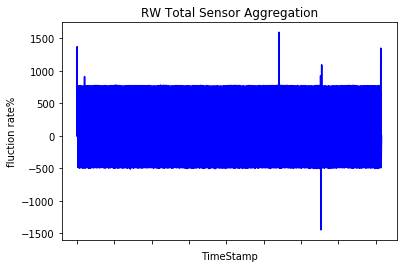

In [17]:
df['Total']= df.select_dtypes(include=['float64']).apply(lambda row: np.sum(row),axis=1) # ['float64','float32']
ts = pd.Series(df['Total'])
ts.plot(c='b', title='RW Total Sensor Aggregation')
plt.xlabel('TimeStamp')
plt.ylabel('fluction rate%')

In [8]:
# Prepare data and inputs for our TF model:
num_periods = 100
f_horizon = 1       #number of periods into the future we are forecasting
TS = np.array(ts)   #convert time series object to an array
print (len(TS))
print (TS[0:10])

81554
[  0.       653.394654   0.       654.689328   0.       654.745154
   0.       655.851588   0.       657.432388]


In [9]:
# Create our training input data set "X":
x_data = TS[:(len(TS)-(len(TS) % num_periods))]
print (x_data[0:5])
x_batches = x_data.reshape(-1, num_periods, 1)
print (len(x_batches))
print (x_batches.shape)

[  0.       653.394654   0.       654.689328   0.      ]
815
(815, 100, 1)


In [10]:
# Create our training output dataset "y":
y_data = TS[1:(len(TS)-(len(TS) % num_periods))+f_horizon]
print (y_data)
print (len(y_data))
y_batches = y_data.reshape(-1, num_periods, 1)
print (len(y_batches))

[ 653.394654    0.        654.689328 ...    0.       -201.706803
    0.      ]
81500
815


In [13]:
# #################################################################
# def load_data(arr, sequence_length=10, split=0.8):

#     #df = pd.read_csv(file_name, sep=',', usecols=[1])
#     #data_all = np.array(df).astype(float)

#     data_all = np.array(arr).astype(float)
#     scaler = MinMaxScaler()
#     data_all = scaler.fit_transform(data_all)
#     data = []
#     for i in range(len(data_all) - sequence_length - 1):
#         data.append(data_all[i: i + sequence_length + 1])
#     reshaped_data = np.array(data).astype('float64')
#     #np.random.shuffle(reshaped_data)
#     x = reshaped_data[:, :-1]
#     y = reshaped_data[:, -1]
#     split_boundary = int(reshaped_data.shape[0] * split)
#     train_x = x[: split_boundary]
#     test_x = x[split_boundary:]

#     train_y = y[: split_boundary]
#     test_y = y[split_boundary:]

#     return train_x, train_y, test_x, test_y, scaler


# def RNN():
#     print("Build model!!")
#     model = Sequential()
#     model.add(LSTM(256, return_sequences=True, input_shape=(10,1)))
#     model.add(LSTM(256, return_sequences=True))
#     model.add(LSTM(256, return_sequences=True))
#     model.add(LSTM(256, return_sequences=False))
#     model.add(Dense(output_dim=1))
#     model.add(Activation('linear'))

#     model.compile(loss='mse', optimizer='rmsprop')
#     return model

# if __name__ == '__main__':
#     data = np.load('q_all_axis0.npy')[1::]
#     data = data.reshape(-1,1)
#     X_train, y_train, X_test, y_test, scaler = load_data(data)

#     # model
#     model = RNN()
#     model.fit(X_train, y_train, validation_split=0.1, batch_size=128, epochs=150, shuffle=True)
    
#########################################################################


# Create our RNN object:
# tf.reset_default_graph()

def rnn_model(array, num_periods):
    x_data = array.reshape(-1,num_periods,1)
    #print (x_data)
    tf.reset_default_graph()   #We didn't have any previous graph objects running, but this would reset the graphs

    inputs = 1            #number of vectors submitted
    hidden = 100          #number of neurons we will recursively work through, can be changed to improve accuracy
    output = 1            #number of output vectors

    X = tf.placeholder(tf.float32, [None, num_periods, inputs], name = "X")   #create variable objects
    y = tf.placeholder(tf.float32, [None, num_periods, output], name = "y")

    basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)   #create our RNN object
    rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)               #choose dynamic over static

    learning_rate = 0.001   #small learning rate so we don't overshoot the minimum
    stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])           #change the form into a tensor
    stacked_outputs = tf.layers.dense(stacked_rnn_output, output)        #specify the type of layer (dense)
    outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])          #shape of results

    loss = tf.reduce_sum(tf.square(outputs - y))    #define the cost function which evaluates the quality of our model
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)          #gradient descent method
    training_op = optimizer.minimize(loss)          #train the result of the application of the cost_function                                 

    init = tf.global_variables_initializer()      #initialize inputs
    saver = tf.train.Saver()                      #specify saver function
    DIR="/home/koukira/IoT_Predictive_Maintenance_Demo/TFmodel"                  #directory where trained TF model is saved

    with tf.Session() as sess:                    #start a new tensorflow session
        saver.restore(sess, os.path.join(DIR,"IoT_TF_model-1000"))    #restore model         
        y_pred = sess.run(outputs, feed_dict={X: x_data})      #load data from streams
        FORECAST = y_pred[:,(num_periods-1):num_periods]       #only print out the last prediction, which is the forecast for next period
    return (FORECAST)


# Create our test X and y data:

def test_data(series,forecast,num_periods):
    test_x_setup = series[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, num_periods, 1)
    testY = TS[-(num_periods):].reshape(-1, num_periods, 1)
    return testX,testY

X_test, Y_test = test_data(TS,f_horizon,num_periods)
print (X_test.shape)
print (X_test[:,(num_periods-1):num_periods])
print (Y_test.shape)
print (Y_test[:,(num_periods-1):num_periods])





# RNN Model using TensorFlow
# Number of arrays submitted:
# Number of neurons we will recursively work through. These can be changed to improve accuracy.
inputs = 1
hidden = 100
num_periods = 100
# Output Array:

output = 1
X = tf.placeholder(tf.float32, [None, num_periods, inputs], name = "X")
y = tf.placeholder(tf.float32, [None, num_periods, output], name = "y")


basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) #怪怪怪
# tf.Graph()
stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])
learning_rate = 0.001
loss = tf.reduce_sum(tf.square(outputs - y),name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

(1, 100, 1)
[[[0.]]]
(1, 100, 1)
[[[4.029848]]]


ValueError: Variable rnn/basic_rnn_cell/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-11-39d68a5d9501>", line 12, in <module>
    rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) #怪怪怪
  File "/home/koukira/yes/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/koukira/yes/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):


In [11]:
# inputs = 1
# hidden = 100
# num_periods = 100
# # Output Array:

# output = 1
# X = tf.placeholder(tf.float32, [None, num_periods, inputs], name = "X")
# y = tf.placeholder(tf.float32, [None, num_periods, output], name = "y")


basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) #怪怪怪

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])
learning_rate = 0.001
loss = tf.reduce_sum(tf.square(outputs - y),name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# Train the result of the application of the cost_function:

training_op = optimizer.minimize(loss)
# Initialize all components:

init = tf.global_variables_initializer()
# Number of iterations or training cycles, which includes both the FeedFoward and Backpropogation:

epochs = 100
# Specify saving the model and where it will be saved:

saver = tf.train.Saver()  
DIR="/home/koukira/IoT_Predictive_Maintenance_Demo/TFmodel"

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [14]:
# Construct our session object that creates our computational graph, and run our model:
# The last value is the last value for our test data X_test of our predicted y_pred array.
with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(ep, "\tMSE:", mse)

    y_pred = sess.run(outputs, feed_dict={X: X_test})
    print(y_pred[:,(num_periods-1):num_periods])
    saver.save(sess, os.path.join(DIR,"IoT_TF_model"),global_step = epochs)

InvalidArgumentError: You must feed a value for placeholder tensor 'y' with dtype float and shape [?,100,1]
	 [[node y (defined at <ipython-input-11-39d68a5d9501>:8)  = Placeholder[dtype=DT_FLOAT, shape=[?,100,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'y', defined at:
  File "/home/koukira/yes/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/koukira/yes/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/koukira/yes/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/koukira/yes/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/koukira/yes/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/koukira/yes/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/koukira/yes/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/koukira/yes/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/koukira/yes/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/koukira/yes/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/home/koukira/yes/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/koukira/yes/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/koukira/yes/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/koukira/yes/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/koukira/yes/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/koukira/yes/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/koukira/yes/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/koukira/yes/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/koukira/yes/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/koukira/yes/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/koukira/yes/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/koukira/yes/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/koukira/yes/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/koukira/yes/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-39d68a5d9501>", line 8, in <module>
    y = tf.placeholder(tf.float32, [None, num_periods, output], name = "y")
  File "/home/koukira/yes/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1747, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/koukira/yes/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5206, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/koukira/yes/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/koukira/yes/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/koukira/yes/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/koukira/yes/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'y' with dtype float and shape [?,100,1]
	 [[node y (defined at <ipython-input-11-39d68a5d9501>:8)  = Placeholder[dtype=DT_FLOAT, shape=[?,100,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
